___
# Project: **Analysis of Developments in Education for Health & Economy**
___
## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#wrangling"><b>Data Wrangling</b></a></li>
<a href="#yearRange">&nbsp;&nbsp;&nbsp;&nbsp; Loading data set files</a>
<br><a href="#yearRange">&nbsp;&nbsp;&nbsp;&nbsp; Year Range</a>
<br><a href="#countriesToConsider">&nbsp;&nbsp;&nbsp;&nbsp; Countries to consider</a>
<br><a href="#commonValidCountries">&nbsp;&nbsp;&nbsp;&nbsp; Common valid countries</a>
<br><a href="#recheckOfCommonValidCountries">&nbsp;&nbsp;&nbsp;&nbsp; Recheck of common valid countries</a>
<br><a href="#loadingDataIntoPandasDataFrames">&nbsp;&nbsp;&nbsp;&nbsp; Loading data into Pandas dataFrames</a>
<br><a href="#subsettingTheDataFrames">&nbsp;&nbsp;&nbsp;&nbsp; Subsetting the dataFrames</a>
<br><a href="#correctingIndexes">&nbsp;&nbsp;&nbsp;&nbsp; Correcting indexes</a>
<br><a href="#addingTheColumnWithAverageValues">&nbsp;&nbsp;&nbsp;&nbsp; Adding the column with average values</a>
<br><li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<a href="#globalAveragesOfTheIndicators">&nbsp;&nbsp;&nbsp;&nbsp; Global averages of the indicators</a>
<br><a href="#correlationBetweenTheIndicatorsForEducationHealthAndEconomy">&nbsp;&nbsp;&nbsp;&nbsp; Correlation between the indicators for education, health and economy</a>
<br><a href="#exceptionsToTheCorrelations">&nbsp;&nbsp;&nbsp;&nbsp; Exceptions to the correlations</a>
<br><li><a href="#conclusions"><b>Conclusions</b></a></li>
<li><a href="#bibliography"><b>Bibliography</b></a></li>
</ul>

___
___

<a id='intro'></a>
## **Introduction**
<br>
This project is aims to understand the effects of developments in education on primarily the health and also the economy of countries across the world using data from [Gapminder](https://www.gapminder.org/data/).

As measures for estimating the above mentioned factors the indicators used in this project as follows:

<br>

| **Indicators for education**       | **Indicators for health**            | **Indicators for economy**  |
| :------------- |:-------------|:-----|
| Adult literacy rate| Life expectancy at birth| GDP/capita (in USD, inflation-adjusted) |
| Female literacy rate | Infant mortality (rate per 1000 births) |   Total GDP (in USD, inflation-adjusted) |

<br>
The data sets from [Gapminder](https://www.gapminder.org/data/) provide details for their respective indicators for each country on an yearly basis.

This project intends to explore the correlations as well as visually convey the relationships in between these indicators using  a data-driven process of Data Wrangling and Exploratory Data Analysis.

<br>
Some of the questions that this analysis aims to answer are as follows:
* What are the patterns of growth in education, health and economy over time for different countries?

* What is the correlation between the developement in education and improvement in health and/or economy?

* Are there any exceptions to the correlations analysed above i.e countries improving in health and economy without much developement in education or vice-versa?

In [1]:
#Importing all the packages required for the project

import os
import numpy as np
from scipy.stats.stats import pearsonr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import xlrd
import xml.etree.cElementTree as ET
from functools import reduce
import math

%matplotlib inline

___
___

<a id='wrangling'></a>
## **Data Wrangling**
<br>
<a id='loadDataSetFiles'></a>
### Loading data set files
<br>
The very first step of the Data Wrangling process would be to load the data set files from the project directory into the jupyter notebook. Along with giving the different data set files their appropriate variable names this can be achieved using the following code.

> Ensure that the all the data set files are in the project directory i.e. the same directory in which this jupyter notebook is present or else make the appropriate file path modifications to the following code.

In [2]:
#Importing all the files into the project
ADULT_LITERACY_RATE_FILE = "indicator SE_ADT_LITR_ZS.xls.xlsx"
FEMALE_LITERACY_RATE_FILE = "indicator SE_ADT_LITR_FE_ZS.xls.xlsx"
LIFE_EXPECTANCY_AT_BIRTH_FILE = "indicator life_expectancy_at_birth.xlsx"
INFANT_MORTALITY_FILE = "indicator gapminder infant_mortality.xlsx"
GDP_PER_CAPITA_FILE = "GDPpercapitaconstant2000US.xlsx"
TOTAL_GDP_FILE = "indicator gdp_total_ppp.xlsx"

___

<a id='yearRange'></a>
### Year Range
<br>
Let us print out the first few rows of the data set to understand how the data points are arranged in the Excel speadsheet.

In [3]:
def parse_file_for_years(datafile): #Function to print the first 10 rows of the imported data set files
    workbook = xlrd.open_workbook(datafile) #Open the file into a workbook using xlrd
    sheet = workbook.sheet_by_index(0) #Select the first sheet

    data = [[sheet.cell_value(r, col) #Assign the values in the sheet to data
                for col in range(sheet.ncols)] 
                    for r in range(sheet.nrows)]
    print (data[0:10])

parse_file_for_years(ADULT_LITERACY_RATE_FILE)

[['Adult (15+) literacy rate (%). Total', 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0], ['Afghanistan', '', '', '', '', 18.1576811342053, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 39.0], ['Albania', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 98.7129780776867, '', '', '', '', '', '', 95.9386397822897, '', '', 96.8452991514299], ['Algeria', '', '', '', '', '', '', '', '', '', '', '', '', 49.630884834899, '', '', '', '', '', '', '', '', '', '', '', '', '', '', 69.8735004434486, '', '', '', 72.6486791729118, '', '', '', '', ''], ['Andorra', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

Upon further investigation of the xlsx file in speadsheet software we can observe that the range of years for which the data of the different indicators is available is not the same for all the indicators. Hence, the first step of the Data Wrangling process would be to find out the **year ranges** for which the data is available for the different indicators and choose the year range for the rest of the analysis accordingly.

To parse the year range for the different data sets into a NumPy array the following code is used.

In [4]:
def parse_file_for_years(datafile): #Function to find the year range of the data points
    workbook = xlrd.open_workbook(datafile) #Open the file into a workbook using xlrd
    sheet = workbook.sheet_by_index(0) #Select the first sheet

    data = [[sheet.cell_value(r, col) #Assign the values in the sheet to data
                for col in range(sheet.ncols)] 
                    for r in range(sheet.nrows)] 
    
    yearRange = np.array([])  #Initialize an empty NumPy array
    x=[] #Initialize an empty list later to be converted to a NumPy array

    for col in range(1,sheet.ncols): #Loop over the years row in the data set and append the values to a list
        list.append(x,int(sheet.cell_value(0,col)))
        
    yearRange = np.array(x) 
    return (yearRange)

Running this code for all the data set files:

In [5]:
adult_literacy_rate_years_range = parse_file_for_years(ADULT_LITERACY_RATE_FILE)
female_literacy_rate_years_range = parse_file_for_years(FEMALE_LITERACY_RATE_FILE)
life_expectancy_at_birth_years_range = parse_file_for_years(LIFE_EXPECTANCY_AT_BIRTH_FILE)
infant_mortality_years_range = parse_file_for_years(INFANT_MORTALITY_FILE)
gdp_per_capita_years_range = parse_file_for_years(GDP_PER_CAPITA_FILE)
total_gdp_years_range = parse_file_for_years(TOTAL_GDP_FILE)

The output of the above parsing is as follows:

In [6]:
print(ADULT_LITERACY_RATE_FILE,os.linesep,adult_literacy_rate_years_range,os.linesep)
print(FEMALE_LITERACY_RATE_FILE,os.linesep,female_literacy_rate_years_range,os.linesep)
print(LIFE_EXPECTANCY_AT_BIRTH_FILE,os.linesep,life_expectancy_at_birth_years_range,os.linesep)
print(INFANT_MORTALITY_FILE,os.linesep,infant_mortality_years_range,os.linesep)
print(GDP_PER_CAPITA_FILE,os.linesep,gdp_per_capita_years_range,os.linesep)
print(TOTAL_GDP_FILE,os.linesep,total_gdp_years_range,os.linesep)

indicator SE_ADT_LITR_ZS.xls.xlsx 
 [1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011] 

indicator SE_ADT_LITR_FE_ZS.xls.xlsx 
 [1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011] 

indicator life_expectancy_at_birth.xlsx 
 [1800 1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813
 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827
 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841
 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855
 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869
 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897
 189

As we can see the year ranges for the different data sets is not the same; with data across more years being available for some indicators and not for others. From observation of the above data we can conclude that the common data range for all the data sets is from **1975 to 2011**.

> **Hence, we will be considering this year range (1975-2011) for further analysis.**

___

<a id='countriesToConsider'></a>
### Countries to consider
<br>
From an obervation of the data sets in a speadsheet software we can see that the data for the indicators is unavailable partially for some countries and completely unavailable for some others over the years. The countries with no data available can lead to incorrect or misleading statistics later in the analysis and hence it is imperative that we deal with them during this Data Wrangling phase before proceeding any further.

Since, we aim to remove the countries that do not have even a single data point, we first have to know which countries have at least one data point. This can be achieved using the following code.

In [7]:
def parse_valid_countries(datafile): #Function to find the year range of the data points
    workbook = xlrd.open_workbook(datafile) #Open the file into a workbook using xlrd
    sheet = workbook.sheet_by_index(0) #Select the first sheet

    data = [[sheet.cell_value(r, col) #Assign the values in the sheet to data
                for col in range(sheet.ncols)] 
                    for r in range(sheet.nrows)]
    
    countries = [[sheet.cell_value(r,0)] for r in range(1,sheet.nrows)] #List of all the countries in the data set
    
    not_empty_list=[] #Initializing an empty list which will store the boolean values for validity of countries
    for i in range(1,sheet.nrows):
        x=sheet.row_values(i,start_colx=1,end_colx=sheet.nrows) #List of all data points for a given country
        x=[str(p) for p in x] #Converting all the data points into strings using a list comprehension
        
        not_empty=False #Flag to keep track of the presence of data points
        for j in x: #Looping over all of the data points for a given country to find at least one data point
            if j!="":
                not_empty = True
                break
            else:
                continue
                
        if not_empty: #Appending the corresponding boolean value for the existance of a data point for a given country
            not_empty_list.append(True)
        else:
            not_empty_list.append(False)
            
    not_empty_list = np.array(not_empty_list) #Converting into NumPy array
    countries = np.array(countries) #Converting into NumPy array
    
    valid_countries = np.array(countries[not_empty_list]) #Vectorized operation to subset the countries for which at least one data point exists
    
    return valid_countries

The code above takes a data set as its input and returns a list of countries that have at least one data point (*valid_countries*). Applying this function to all of the data sets and assigning the output list of countries to the appropriate countries is done by the following code.

In [8]:
adult_literacy_valid_countries = parse_valid_countries(ADULT_LITERACY_RATE_FILE)
female_literacy_valid_countries = parse_valid_countries(FEMALE_LITERACY_RATE_FILE)
life_expectancy_at_birth_valid_countries = parse_valid_countries(LIFE_EXPECTANCY_AT_BIRTH_FILE)
infant_mortality_valid_countries = parse_valid_countries(INFANT_MORTALITY_FILE)
gdp_per_capita_valid_countries = parse_valid_countries(GDP_PER_CAPITA_FILE)
total_gdp_valid_countries = parse_valid_countries(TOTAL_GDP_FILE)

The list of valid countries from the different data sets are shown below. (Only 10 values for each of the data sets is shown below as the entire list takes up a lot of space to display)

In [9]:
print (ADULT_LITERACY_RATE_FILE,os.linesep,adult_literacy_valid_countries[:10],os.linesep)
print (FEMALE_LITERACY_RATE_FILE,os.linesep,female_literacy_valid_countries[:10],os.linesep)
print (LIFE_EXPECTANCY_AT_BIRTH_FILE,os.linesep,life_expectancy_at_birth_valid_countries[:10],os.linesep)
print (INFANT_MORTALITY_FILE,os.linesep,infant_mortality_valid_countries[:10],os.linesep)
print (GDP_PER_CAPITA_FILE,os.linesep,gdp_per_capita_valid_countries[:10],os.linesep)
print (TOTAL_GDP_FILE,os.linesep,total_gdp_valid_countries[:10],os.linesep)

indicator SE_ADT_LITR_ZS.xls.xlsx 
 [['Afghanistan']
 ['Albania']
 ['Algeria']
 ['Angola']
 ['Anguilla']
 ['Antigua and Barbuda']
 ['Argentina']
 ['Armenia']
 ['Aruba']
 ['Azerbaijan']] 

indicator SE_ADT_LITR_FE_ZS.xls.xlsx 
 [['Afghanistan']
 ['Albania']
 ['Algeria']
 ['Angola']
 ['Anguilla']
 ['Antigua and Barbuda']
 ['Argentina']
 ['Armenia']
 ['Aruba']
 ['Azerbaijan']] 

indicator life_expectancy_at_birth.xlsx 
 [['Afghanistan']
 ['Albania']
 ['Algeria']
 ['American Samoa']
 ['Andorra']
 ['Angola']
 ['Antigua and Barbuda']
 ['Argentina']
 ['Armenia']
 ['Aruba']] 

indicator gapminder infant_mortality.xlsx 
 [['Afghanistan']
 ['Albania']
 ['Algeria']
 ['Andorra']
 ['Angola']
 ['Antigua and Barbuda']
 ['Argentina']
 ['Armenia']
 ['Australia']
 ['Austria']] 

GDPpercapitaconstant2000US.xlsx 
 [['Albania']
 ['Algeria']
 ['Andorra']
 ['Angola']
 ['Antigua and Barbuda']
 ['Argentina']
 ['Armenia']
 ['Aruba']
 ['Australia']
 ['Austria']] 

indicator gdp_total_ppp.xlsx 
 [['Afghanistan']


___

<a id='commonValidCountries'></a>
### Common valid countries
<br>
Our next step, as we did previously in determining the common **years range** is to find the which of the valid countries are present in all of the data sets so that we can use data only from them in our analysis.

We can find the countries that are common to all of the data sets that contain at least one data point by taking the intersection of the above lists for the different data sets. The code for the same is given below.

In [10]:
#Taking the intersection of the valid_countries to get the countries common in all of the data sets
common_valid_countries = reduce(np.intersect1d, (adult_literacy_valid_countries, female_literacy_valid_countries, life_expectancy_at_birth_valid_countries, infant_mortality_valid_countries, gdp_per_capita_valid_countries, total_gdp_valid_countries))
print (common_valid_countries)

['Albania' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Cape Verde'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Gabon'
 'Gambia' 'Georgia' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania'
 'Macedonia, FYR' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Mali'
 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Moldova' 'Mongolia'
 'Montenegro' 'Morocco' 'Mozambique' 'Namibia' 'Nepal' 'Nicaragua' 'Niger'
 'Nigeria' 'Oman' 'Pak

We can also find the number of countries which have at least one data point in all of the data sets and are contained in all of the data sets i.e. the number is countries in the list above using the following code.

In [11]:
print (common_valid_countries.size)

142


So we are left out with **142 countries** for which we will be analysing the different indicators from the years **1975 to 2011**.

___

<a id='recheckOfCommonValidCountries'></a>
### Recheck of common valid countries
<br>
To recheck if the countries in the list above are actually present in all of the data sets, we run the following code on the NumPy array containing the list of all the countries for each of the data sets.

In [12]:
def parse_countries(datafile): #Function to return a list of all the countries from a data set
    workbook = xlrd.open_workbook(datafile) #Open the file into a workbook using xlrd
    sheet = workbook.sheet_by_index(0) #Select the first sheet

    data = [[sheet.cell_value(r, col) #Assign the values in the sheet to data
                for col in range(sheet.ncols)] 
                    for r in range(sheet.nrows)]
    return (sheet.col_values(0,start_rowx=1))
    
#Creating NumPy arrays containing the list of all countries for each of the data sets    
alr_countries = np.array(parse_countries(ADULT_LITERACY_RATE_FILE))
flr_countries = np.array(parse_countries(FEMALE_LITERACY_RATE_FILE))
leab_countries = np.array(parse_countries(LIFE_EXPECTANCY_AT_BIRTH_FILE))
im_countries = np.array(parse_countries(INFANT_MORTALITY_FILE))
gdppc_countries = np.array(parse_countries(GDP_PER_CAPITA_FILE))
tgdp_countries = np.array(parse_countries(TOTAL_GDP_FILE))

#Function that will check is all the valid countries are present in a data set or not
def all_valid_countries_present(country_data):
    all_countries_present = True
    for country in common_valid_countries:
        if country not in country_data:
            all_countries_present = False
    print (all_countries_present)
    
#Running the above function on each of the data sets
all_valid_countries_present(alr_countries)
all_valid_countries_present(flr_countries)
all_valid_countries_present(leab_countries)
all_valid_countries_present(im_countries)
all_valid_countries_present(gdppc_countries)
all_valid_countries_present(tgdp_countries)

True
True
True
True
True
True


From the output above we can conclude that our list of common countries containing at least one data point (*common_valid_countries*) is indeed correct.

___

<a id='loadingDataIntoPandasDataFrames'></a>
### Loading data into Pandas dataFrames
<br>
Now that we have determined the countries and the time frame (range of  years) on which we will be performing our analyis, the next step is to consolidate all of the relevant data into a suitable data type (like a Pandas dataFrame) to proceed further with our analysis.

Each of the data sets are parsed and stored into Pandas dataFrames by the following code.

In [13]:
adult_literacy_df = pd.read_excel(ADULT_LITERACY_RATE_FILE, sheetname='Data')
female_literacy_df = pd.read_excel(FEMALE_LITERACY_RATE_FILE, sheetname='Data')
life_expectancy_at_birth_df = pd.read_excel(LIFE_EXPECTANCY_AT_BIRTH_FILE, sheetname='Data')
infant_mortality_df = pd.read_excel(INFANT_MORTALITY_FILE, sheetname='Data')
gdp_per_capita_df = pd.read_excel(GDP_PER_CAPITA_FILE, sheetname='Data')
total_gdp_df = pd.read_excel(TOTAL_GDP_FILE, sheetname='Data')

___

<a id='subsettingTheDataFrames'></a>
### Subsetting the dataFrames
<br>
Next, we have to subset each of the above dataFrames so as to only include the data points in the year range 1975-2011 and the countries in *common_valid_countries*.

To subset the countries, we use a function that loops over all of the countries in the common valid countries and searches for them in the list of all the countries for each of the data sets and if found, append the index of the found country to a list which is later coverted to a NumPy array.

In [14]:
def indexes_of_valid_country(country_list): #Fuunction to return a NumPy array containing the indexes of the countries in common_valid_countries
    indexes = []
    country_list = list(country_list) #Converting the input NumPy array (function parameter) of the countries in the dataFrame into a list
    for country in common_valid_countries: #Looping over all the countries in common_valid_countries and appending the indexes of the countries found in the dataFrame to the empty list created above
        if country in country_list:
            indexes.append(country_list.index(country))
    return np.array(indexes)

Now that we have a array indicating the indexes of the valid countries, we use this data to subset the reespective dataFrames.

The following code achieves this subseting to include only the common_valid_countries.

In [15]:
alr_indexes = indexes_of_valid_country(alr_countries)
flr_indexes = indexes_of_valid_country(flr_countries)
leab_indexes = indexes_of_valid_country(leab_countries)
im_indexes = indexes_of_valid_country(im_countries)
gdppc_indexes = indexes_of_valid_country(gdppc_countries)
tgdp_indexes = indexes_of_valid_country(tgdp_countries)

Next we need to find the indexes of the years in the year range 1975-2011 so as to further subset our dataFrames according to the year range.

The function to peform this works similar to the *parse_valid_coutries()* function and loops over the row containing the years and returns a NumPy array with the positions of the years in the range 1975-2011.

The code for this function is given below.

In [16]:
def parse_valid_year_indexes(datafile): #Function to return a list of all the countries from a data set
    workbook = xlrd.open_workbook(datafile) #Open the file into a workbook using xlrd
    sheet = workbook.sheet_by_index(0) #Select the first sheet

    data = [[sheet.cell_value(r, col) #Assign the values in the sheet to data
                for col in range(sheet.ncols)] 
                    for r in range(sheet.nrows)]
    
    years = [[sheet.cell_value(0,c)] for c in range(0,sheet.ncols)] #List of all the years in the data set
    for i in range(sheet.ncols): #Looping over all the columns of the first row to convert each of the year column names into int
        years[i] = years[i][0]
    years = years[1:]
    years = [int(y) for y in years]
    
    year_indexes = [False] #Initializing a list for storing the boolean value indicating the presence of a valid country in the year range with one False value for the first column containing the name of the table
        
    for i in years:
        if i>=1975 and i<=2011:
            year_indexes.append(True)
        else:
            year_indexes.append(False)
            
    year_indexes = np.array(year_indexes) #Converting into NumPy array
    
    return year_indexes

alr_year_indexes = parse_valid_year_indexes(ADULT_LITERACY_RATE_FILE)
flr_year_indexes = parse_valid_year_indexes(FEMALE_LITERACY_RATE_FILE)
leab_valid_year_indexes = parse_valid_year_indexes(LIFE_EXPECTANCY_AT_BIRTH_FILE)
im_valid_year_indexes = parse_valid_year_indexes(INFANT_MORTALITY_FILE)
gdppc_valid_year_indexes = parse_valid_year_indexes(GDP_PER_CAPITA_FILE)
tgdp_valid_year_indexes = parse_valid_year_indexes(TOTAL_GDP_FILE)

Now we have the NumPy arrays for the valid countries and also the year range to subset the dataFrames with. The subsetting is done by the code below.

In [17]:
adult_literacy_final = adult_literacy_df.loc[alr_indexes,alr_year_indexes]
female_literacy_final = female_literacy_df.loc[flr_indexes,flr_year_indexes]
life_expectancy_at_birth_final = life_expectancy_at_birth_df.loc[leab_indexes,leab_valid_year_indexes]
infant_mortality_final = infant_mortality_df.loc[im_indexes,im_valid_year_indexes]
gdp_per_capita_final = gdp_per_capita_df.loc[gdppc_indexes,gdppc_valid_year_indexes]
total_gdp_final = total_gdp_df.loc[tgdp_indexes,tgdp_valid_year_indexes]

To view the output of the above subsetting, the *adult_literacy_final* dataFrame is printed below. Notice that, the number of row and columns is according to our expectation which is 142 rows (one for the 142 common valid countries) and 37 columns (one for each of the 37 years in the year range 1975-2011).

In [18]:
life_expectancy_at_birth_final.head(10)

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3,69.77,70.17,70.54,70.86,71.14,71.39,71.63,71.88,72.15,72.42,...,75.5,75.7,75.9,76.2,76.4,76.6,76.8,77.0,77.2,77.4
4,55.24,56.11,57.13,58.28,59.56,60.92,62.31,63.69,64.97,66.15,...,73.8,73.9,74.4,74.8,75.0,75.3,75.5,75.7,76.0,76.1
7,44.22,44.68,45.12,45.50,45.84,46.14,46.42,46.69,46.96,47.23,...,53.3,53.9,54.5,55.2,55.7,56.2,56.7,57.1,57.6,58.1
9,68.99,69.32,69.64,69.96,70.28,70.59,70.90,71.22,71.52,71.82,...,74.3,74.5,74.6,74.9,74.9,75.3,75.5,75.7,75.8,75.9
10,68.60,68.92,69.24,69.57,69.89,70.20,70.51,70.78,71.04,71.26,...,74.3,74.5,75.0,75.3,75.3,75.2,75.4,75.6,75.8,76.0
11,72.33,72.38,72.44,72.53,72.63,72.72,72.73,72.64,72.43,72.10,...,71.6,71.5,71.8,71.8,71.7,72.3,72.3,72.6,73.0,73.5
15,66.02,65.92,65.80,65.68,65.60,65.55,65.61,65.73,65.92,66.15,...,67.6,67.6,67.8,68.2,68.7,69.1,69.2,69.7,70.1,70.8
17,66.63,67.20,67.72,68.21,68.67,69.09,69.47,69.83,70.16,70.46,...,74.8,75.3,75.7,76.1,76.3,77.0,77.6,78.2,78.7,78.8
18,47.58,48.92,50.27,51.47,52.44,53.18,53.72,54.15,54.57,55.00,...,65.8,66.3,66.8,67.1,67.5,67.7,68.3,68.6,68.8,69.3
20,71.63,71.46,71.39,71.23,70.82,70.57,70.84,70.95,70.73,70.09,...,67.9,68.2,68.5,68.7,69.1,69.7,70.0,70.1,70.2,70.3


___

<a id='correctingIndexes'></a>
### Correcting indexes
<br>
At this stage, we have all of our data in a dataFrame and containing the data for only those years and countries we desire necessary for our analysis.

One observation we can make from the above output is that the row names (indexes of the dataFrame) are not continuous which may be inconvinient when we perform our analysis.

The indexes of the dataFrames are corrected by the following function.

In [19]:
def correct_indexes(df): #Function which makes the indexes of the dataFrame continuous
    df.index = range(common_valid_countries.size)
    return df

adult_literacy_final = correct_indexes(adult_literacy_final)
female_literacy_final = correct_indexes(female_literacy_final)
life_expectancy_at_birth_final = correct_indexes(life_expectancy_at_birth_final)
infant_mortality_final = correct_indexes(infant_mortality_final)
gdp_per_capita_final = correct_indexes(gdp_per_capita_final)
total_gdp_final = correct_indexes(total_gdp_final)

In [20]:
adult_literacy_final.head(10)

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,95.93864,NaN,NaN,96.845299
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.8735,NaN,NaN,NaN,72.648679,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.362420
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.950000
4,NaN,NaN,NaN,NaN,NaN,93.91286,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.858770
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.568170
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,99.601906,NaN,99.759841,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,69.753514,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.556792,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,29.227233,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.734790
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.617061,NaN,NaN


From the above output we can see that the indexes have been modified as per our requirement.

___

<a id='addingTheColumnWithAverageValues'></a>
### Adding the column with average values
<br>
From the output of one of the dataFrames above we can see that not all the countries have the same number of data points across the year range. For the ease of analysis, we can add a column containing the average value of the data point(s) across the year range.

(This step was added to the Data Wrangling process while mid-way through the Analysis phase)

The code for the same is as follows.

In [21]:
def add_avg_column(df): #Function to add a column containing the average value of each of the rows to a copy the existing dataFrame
    df2 = df.copy()
    (df2).loc[:,'avg'] = pd.Series(df2.mean(axis=1), index=df2.index)
    return df2

adult_literacy_with_averages = add_avg_column(adult_literacy_final)
female_literacy_with_averages = add_avg_column(female_literacy_final)
life_expectancy_at_birth_with_averages = add_avg_column(life_expectancy_at_birth_final)
infant_mortality_with_averages = add_avg_column(infant_mortality_final)
gdp_per_capita_with_averages = add_avg_column(gdp_per_capita_final)
total_gdp_with_averages = add_avg_column(total_gdp_final)

In [22]:
infant_mortality_with_averages.head(10)

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,avg
0,63.1,60.8,58.6,73.0,68.4,64,59.9,56.1,52.4,49.1,...,20.0,19.1,18.3,17.4,16.7,16.0,15.4,14.8,14.3,35.044444
1,128.7,124.0,119.0,113.6,107.8,101.1,93.4,84.6,75.0,65.5,...,31.3,30.1,28.8,27.6,26.4,25.3,24.3,23.5,22.8,51.583333
2,NaN,NaN,NaN,NaN,NaN,138.3,137.5,136.8,136.0,135.3,...,124.1,122.8,121.2,119.4,117.1,114.7,112.2,109.6,106.8,128.025806
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.7,11.0,10.4,9.8,9.2,8.8,8.2,7.7,7.2,14.172727
4,53.2,50.5,47.2,43.8,40.3,37.2,34.7,32.8,31.3,30.1,...,16.6,16.0,15.3,14.6,14.1,13.7,13.4,13.0,12.7,24.838889
5,NaN,70.8,68.3,65.9,63.5,61.3,59.2,57.1,55.2,53.3,...,23.0,21.9,20.8,19.8,18.8,17.9,17.0,16.1,15.3,38.020000
6,NaN,NaN,NaN,NaN,NaN,95,NaN,84.9,83.1,81.5,...,49.7,46.7,44.0,41.5,39.3,37.3,35.5,33.9,32.5,63.340000
7,37.7,35.0,32.6,30.4,28.5,26.8,25.3,24.0,22.8,21.9,...,9.9,9.6,9.3,9.0,8.5,8.1,7.6,7.1,6.7,17.369444
8,145.2,143.5,141.4,139.1,136.5,133.7,130.8,127.8,124.6,121.3,...,55.9,53.4,50.8,48.4,45.9,43.6,41.3,39.2,37.2,88.744444
9,NaN,NaN,NaN,NaN,NaN,19.4,18.5,17.7,17.0,16.5,...,8.6,7.9,7.4,6.8,6.2,5.6,5.1,4.7,4.3,11.909677


___

<a id='cheeckingForNan'></a>
### Checking for NaN
<br>
The last step in the Data Wrangling process would be to make sure that there are no NaN values in the avg column of any of the dataFrames. And if there is one, then replace it with 0 so that it does not cause any errors during the analysis phase.

(This step was added after the realization that there are NaN values in the 'avg' column of infant_mortality_with_averages dataFrame during the Analysis phase)

In [23]:
print (adult_literacy_with_averages.loc[:,'avg'].isnull().values.any())
print (female_literacy_with_averages.loc[:,'avg'].isnull().values.any())
print (life_expectancy_at_birth_with_averages.loc[:,'avg'].isnull().values.any())
print (infant_mortality_with_averages.loc[:,'avg'].isnull().values.any())
print (gdp_per_capita_with_averages.loc[:,'avg'].isnull().values.any())
print (total_gdp_with_averages.loc[:,'avg'].isnull().values.any())

False
False
False
True
False
False


The **infant_mortality_with_averages** dataFrame has NaN value(s) in its **avg** column. The following code changes all of the NaN value(s) it this column to 0.

In [24]:
(infant_mortality_with_averages.loc[:,'avg']).fillna('0',inplace=True)

infant_mortality_with_averages.loc[:,'avg'] = [float(value) for value in infant_mortality_with_averages.loc[:,'avg']]

Checking again, we can see that the NaN value(s) has been removed.

In [25]:
print (adult_literacy_with_averages.loc[:,'avg'].isnull().values.any())
print (female_literacy_with_averages.loc[:,'avg'].isnull().values.any())
print (life_expectancy_at_birth_with_averages.loc[:,'avg'].isnull().values.any())
print (infant_mortality_with_averages.loc[:,'avg'].isnull().values.any())
print (gdp_per_capita_with_averages.loc[:,'avg'].isnull().values.any())
print (total_gdp_with_averages.loc[:,'avg'].isnull().values.any())

False
False
False
False
False
False


>#### **This marks the end of the Data Wrangling phase now that our raw data is in the desired format. Exploratory Data Analysis is the next phase of this project.**

___
___

<a id='eda'></a>
## **Exploratory Data Analysis**
<br>
<a id='globalAveragesOfTheIndicators'></a>
### Global averages of the indicators
<br>
This phase of the project involves the analysis of the wrangled data from the previous phase.

Since, we already have the average values of the data points for the different indicators for different countries we can do a simple analysis of the global averages of the different indicators to get a basic understanding of the data.

The code for the same is given below.

In [26]:
def global_average(df): #Function to return the mean value along the 'avg' column
    return df['avg'].mean(axis=0)

alr_global_average = global_average(adult_literacy_with_averages)
flr_global_average = global_average(female_literacy_with_averages)
leab_global_average = global_average(life_expectancy_at_birth_with_averages)
im_global_average = global_average(infant_mortality_with_averages)
gdppc_global_average = global_average(gdp_per_capita_with_averages)
tgdp_global_average = global_average(total_gdp_with_averages)


print ("Adult literacy global average =          ",alr_global_average)
print ("Female literacy global average =         ",flr_global_average)
print ("Life expectancy at birth global average =",leab_global_average)
print ("Infant mortality global average =        ",im_global_average)
print ("GDP/capita global average =              ",gdppc_global_average)
print ("Total GDP global average =               ",tgdp_global_average)

Adult literacy global average =           77.48598129308972
Female literacy global average =          72.95042564828181
Life expectancy at birth global average = 65.15982489531791
Infant mortality global average =         52.32844080961791
GDP/capita global average =               3433.542788988646
Total GDP global average =                201655273848.07483


In the analysis henceforth, since the indexes of the dataFrames correspond to the common valid countries, the visualizations will only contain the index of the country in place of the name of the country.

That is, instead of 'Albania', 'Algeria',... 0, 1, ... will be used.

For the sake of recollection here is the list of the common valid countries and their corresponding indexes.

In [27]:
common_valid_countries_with_indexes = pd.DataFrame(data=[common_valid_countries])

print (common_valid_countries_with_indexes)

       0        1       2                    3          4        5    \
0  Albania  Algeria  Angola  Antigua and Barbuda  Argentina  Armenia   

          6        7           8        9      ...         132  \
0  Azerbaijan  Bahrain  Bangladesh  Belarus    ...     Ukraine   

                    133      134         135      136        137      138  \
0  United Arab Emirates  Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam   

                  139     140       141  
0  West Bank and Gaza  Zambia  Zimbabwe  

[1 rows x 142 columns]


To set the size of the plots to be displayed the following code is executed.

In [28]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

<a id='variationOfTheIndicatorsWithTime'></a>
### Variation of the indicators with time
<br>
The plots for the variation of the various indicators are as follows.

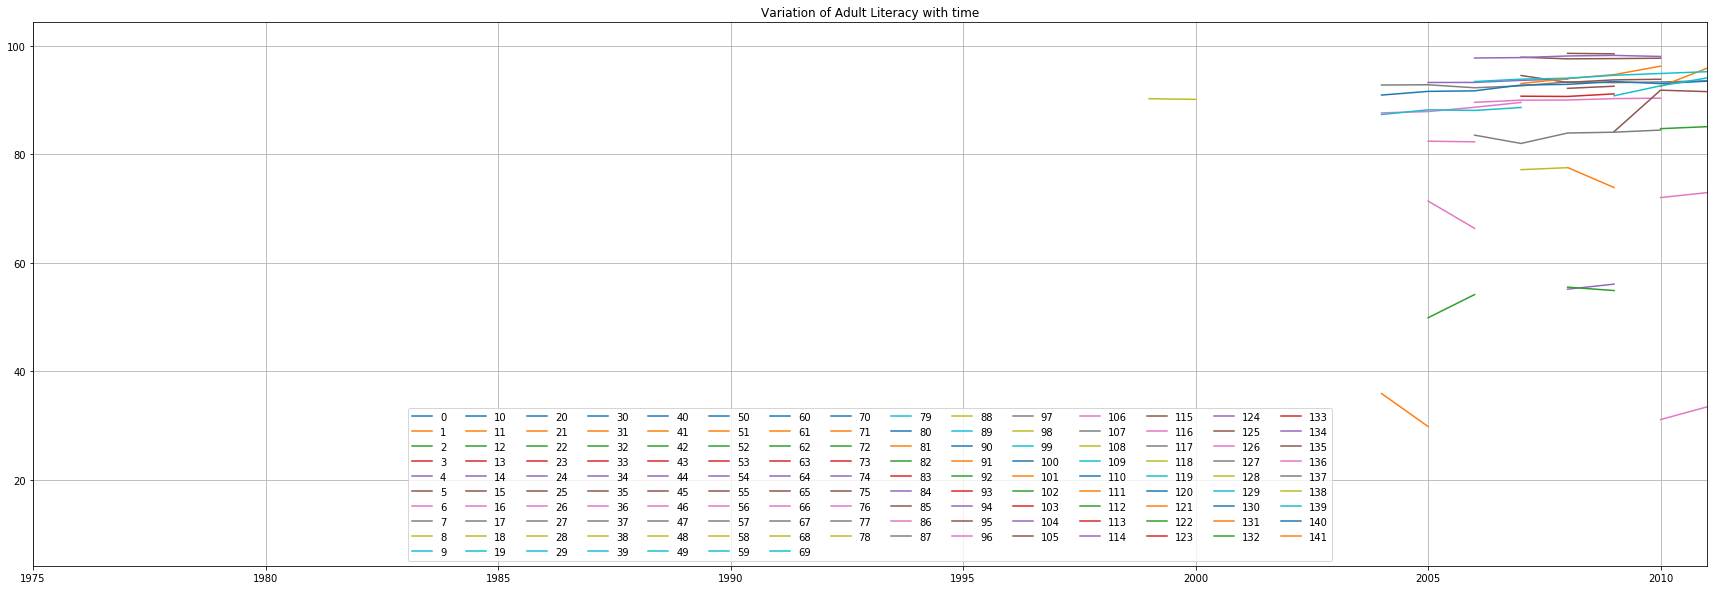

In [29]:
(adult_literacy_final.T).plot(title='Variation of Adult Literacy with time',kind='line',grid=True)
plt.legend(loc='best',ncol=15)

We can see that there is not a lot of data available for Adult Literacy over the years and hence analysing changes in it over time may be difficult.

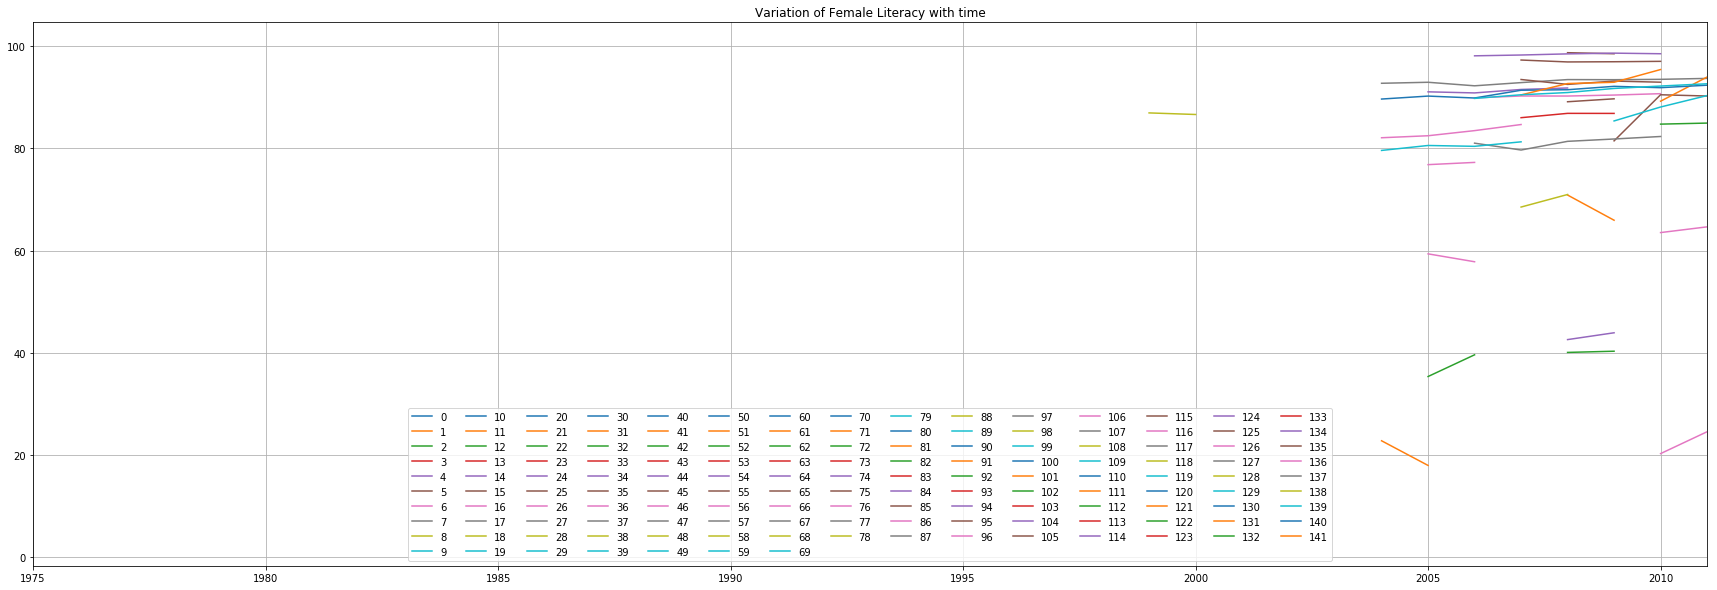

In [30]:
(female_literacy_final.T).plot(title='Variation of Female Literacy with time',kind='line',subplots=False,grid=True)
plt.legend(loc='best',ncol=15)

<a id='whyAverageOfEducationIndicatorsIsChosen'></a>
Similar, to the Adult Literacy, Female Literacy also does not have a lot of data available for analysis over the years.

From the plots of Adult and Female Literacy, we can understand that the analysis of the variations in these indicators over the years might be difficult to carry out. Hence, we will be using their average value which we have already computed and added to their respective dataFrames for answering questions that involve the developements in education.

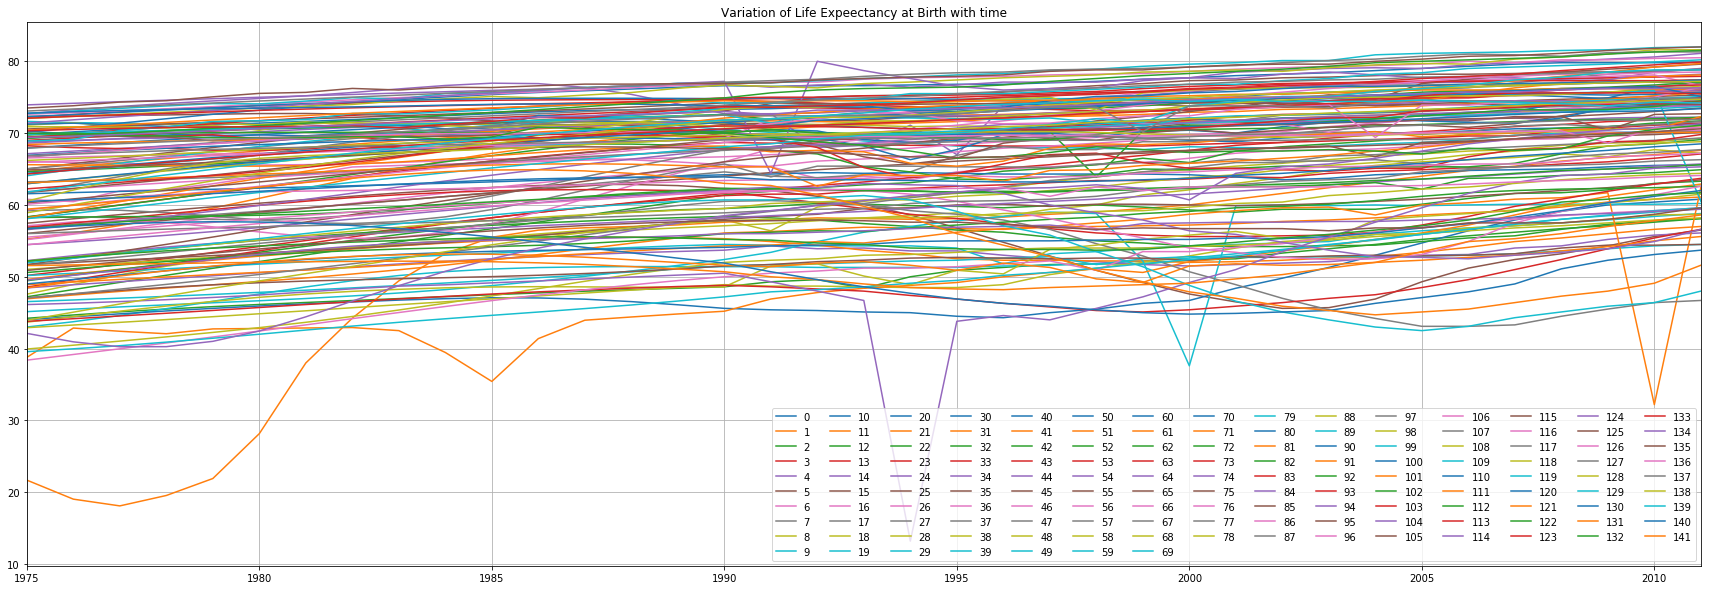

In [31]:
(life_expectancy_at_birth_final.T).plot(title='Variation of Life Expeectancy at Birth with time',kind='line',subplots=False,grid=True)
plt.legend(loc='best',ncol=15)

From the above plot we can observe that the Life Expectancy at Birth has been steadily increasing over the years.

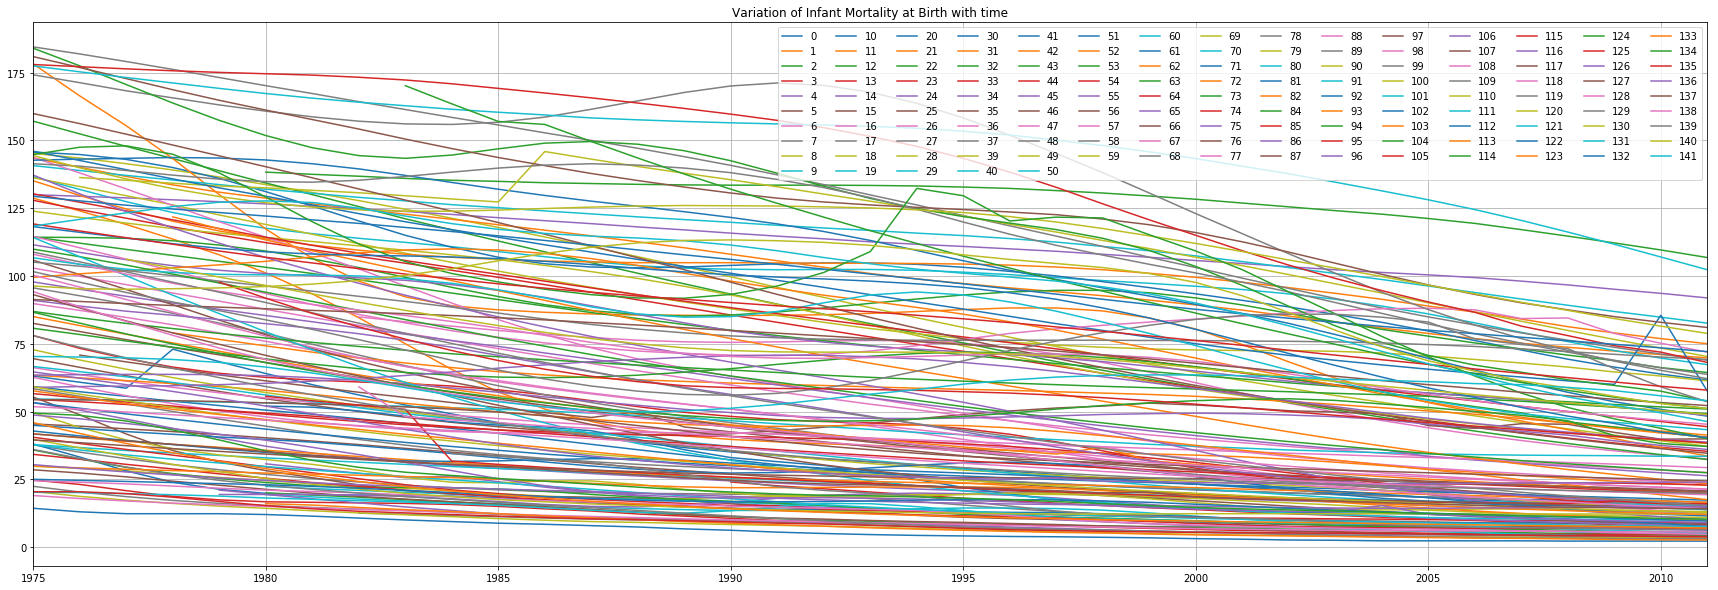

In [32]:
(infant_mortality_final.T).plot(title='Variation of Infant Mortality at Birth with time',kind='line',subplots=False,grid=True)
plt.legend(loc='best',ncol=15)

The Infant Mortality has been steadily decreasing.

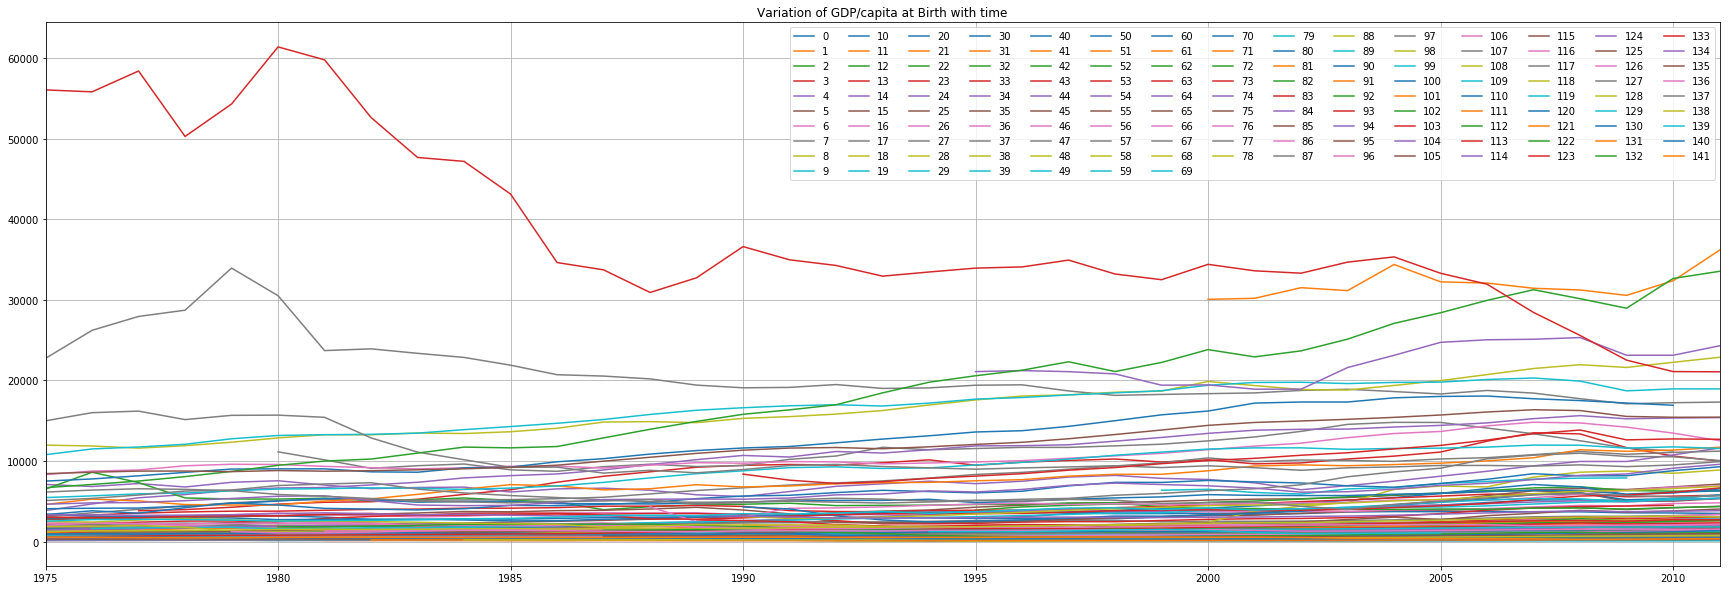

In [33]:
(gdp_per_capita_final.T).plot(title='Variation of GDP/capita at Birth with time',kind='line',subplots=False,grid=True)
plt.legend(loc='best',ncol=15)

The GDP/capita has been slowly increasing for some countries and has fallen very dramatically for one of the countries. The country with the dramatic decrease in GDP/capita can be found out with the code below.

In [34]:
print (common_valid_countries[gdp_per_capita_with_averages['avg'].idxmax(axis=1)])

United Arab Emirates


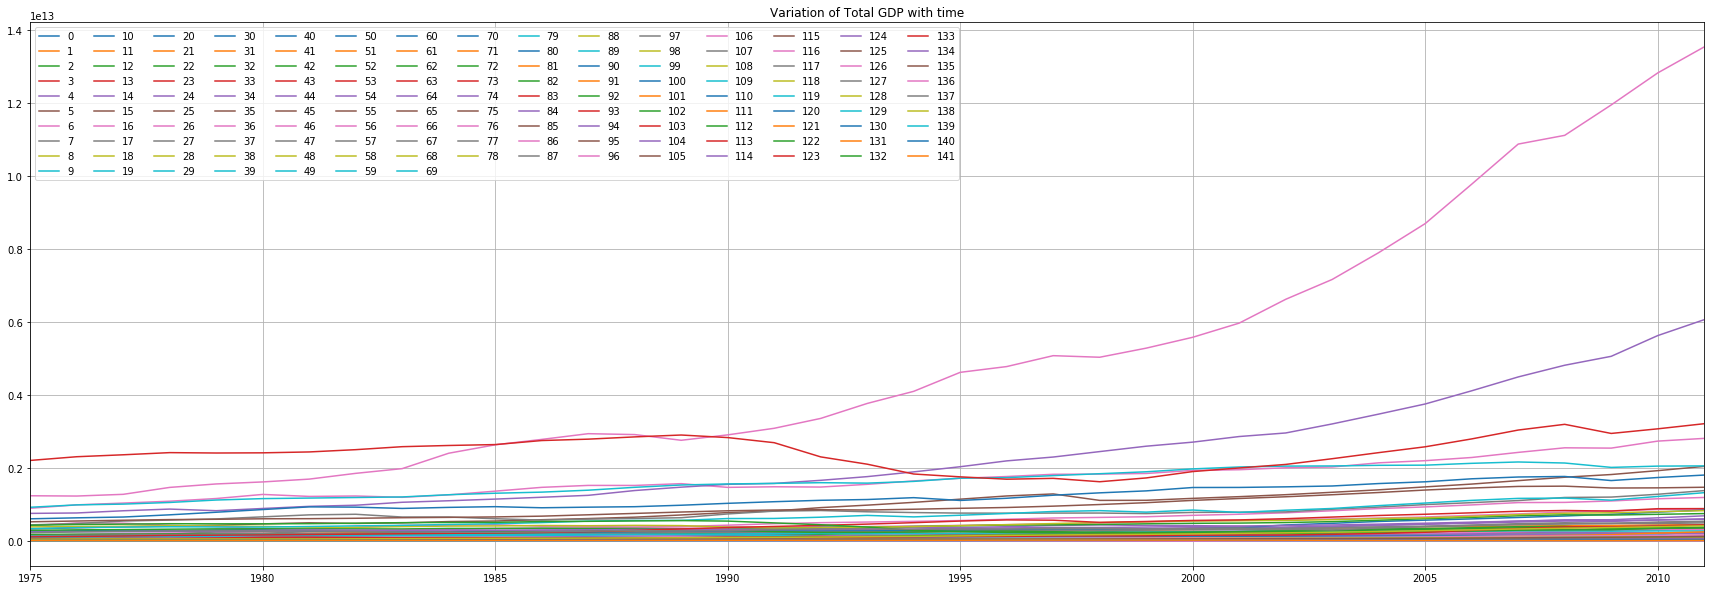

In [35]:
(total_gdp_final.T).plot(title='Variation of Total GDP with time',kind='line',subplots=False,grid=True)
plt.legend(loc='best',ncol=15)

One of the countries has witnessed a significant increease in its Total GDP. We can find which country it is from the code below.

In [36]:
print (common_valid_countries[total_gdp_with_averages['avg'].idxmax(axis=1)])

China


The changes in Total GDP is varied among the different countries. For some countries it has been steadily rising while for some it has nearly remained the same or increased by small amounts.

From the above plots, we can answer our first question that is

>**What are the patterns of growth in education, health and economy over time for different countries?**

The developemnts in educations over time are difficult to estimate as data over multiple years is only available for only a small number of countries. As the average values of the two education indicators will be used in the further analysis, it may reveal some new insights reegarding the developments in education.

The indicators for health cleary indicate that the health of countries has been steadily inproving over the year range of our analysis with Life Expectancy at Birth increasing and Infant Mortality decreasing.

The changes in the economies of the countries are difficult to judge as, for some countries it has been improving, while for some it remains nearly the same while for some others it is degrading.

___

<a id='correlationBetweenTheIndicatorsForEducationHealthAndEconomy'></a>
### Correlation between the indicators for education, health and economy
<br>
Next, we plan on analysing the correlation between the developments in education and improvement in health and economy. To perform this analysis, we will be looking at the correlation between the average values of the education indicators (why the average value is chosen for the education indicators is explained <a href="#whyAverageOfEducationIndicatorsIsChosen">here</a>) and those of the health and economy variables for different countries.

Also, Infant Mortality is an indicator whose lower numerical value implies a better health condition whereas for all the other indicators, higher is better. Further, the range of values vary widely for the various indicators. To deal with these inconsistencies, we shall normalize the values of all the indicators to a range of values in between 0 and 1.

In [37]:
#Creating a separate dataFrame to store the indicators
indicators = pd.DataFrame(
                {'mean_of_education_indicators' : (adult_literacy_with_averages.loc[:,'avg']+female_literacy_with_averages.loc[:,'avg'])/2,
                 'Life Expectancy at Birth' : life_expectancy_at_birth_with_averages.loc[:,'avg'],
                 'Infant Mortality' : infant_mortality_with_averages.loc[:,'avg'],
                'GDP/capita' : gdp_per_capita_with_averages.loc[:,'avg'],
                'Total GDP' : total_gdp_with_averages.loc[:,'avg']}
                        )

indicators = indicators[['mean_of_education_indicators','Life Expectancy at Birth','Infant Mortality','GDP/capita','Total GDP']]
indicators.head(10)

,mean_of_education_indicators,Life Expectancy at Birth,Infant Mortality,GDP/capita,Total GDP
0,96.687081,73.765135,35.044444,1201.566009,1.660525e+10
1,58.664474,69.207297,51.583333,1894.294899,2.884182e+11
2,62.642696,50.409189,128.025806,383.529960,5.355046e+10
3,99.185000,73.064865,14.172727,8806.493107,1.147789e+09
4,96.224903,72.783243,24.838889,7499.935454,3.828405e+11
5,99.080876,71.337027,38.020000,846.426661,1.321400e+10
6,99.234727,66.501351,63.340000,1137.957718,5.857542e+10
7,80.695786,72.691081,17.369444,11399.367941,2.200732e+10
8,38.476410,60.039189,88.744444,337.601778,1.512004e+11
9,98.772183,69.781892,11.909677,1620.059149,8.556369e+10


In [38]:
#Function to normalize the range of values of the indicators to between 0 and 1
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

normalized_indicators = normalize(indicators)
normalized_indicators.head(10)

,mean_of_education_indicators,Life Expectancy at Birth,Infant Mortality,GDP/capita,Total GDP
0,0.963839,0.865154,0.236330,0.027874,0.003277
1,0.514257,0.713681,0.347864,0.046063,0.057829
2,0.561296,0.088958,0.863370,0.006396,0.010692
3,0.993375,0.841881,0.095577,0.227550,0.000175
4,0.958375,0.832522,0.167507,0.193245,0.076779
5,0.992144,0.784459,0.256396,0.018550,0.002596
6,0.993963,0.623754,0.427147,0.026204,0.011700
7,0.774757,0.829459,0.117135,0.295629,0.004361
8,0.275552,0.408995,0.598468,0.005190,0.030290
9,0.988494,0.732777,0.080316,0.038862,0.017117


In [39]:
#Correcting the values for Infact Mortality
normalized_indicators.loc[:,'Infant Mortality'] = 1 - (normalized_indicators.loc[:,'Infant Mortality'])
normalized_indicators.head(10)

,mean_of_education_indicators,Life Expectancy at Birth,Infant Mortality,GDP/capita,Total GDP
0,0.963839,0.865154,0.763670,0.027874,0.003277
1,0.514257,0.713681,0.652136,0.046063,0.057829
2,0.561296,0.088958,0.136630,0.006396,0.010692
3,0.993375,0.841881,0.904423,0.227550,0.000175
4,0.958375,0.832522,0.832493,0.193245,0.076779
5,0.992144,0.784459,0.743604,0.018550,0.002596
6,0.993963,0.623754,0.572853,0.026204,0.011700
7,0.774757,0.829459,0.882865,0.295629,0.004361
8,0.275552,0.408995,0.401532,0.005190,0.030290
9,0.988494,0.732777,0.919684,0.038862,0.017117


Now that we have normalized the ranges of the various indicators, we can perform our analysis.

In [40]:
print ("Correlation between Education and Life Expectancy at Birth  :",(pearsonr(normalized_indicators.loc[:,'mean_of_education_indicators'],normalized_indicators.loc[:,'Life Expectancy at Birth'])))
print ("Correlation between Education and Infant Mortality          :",(pearsonr(normalized_indicators.loc[:,'mean_of_education_indicators'],normalized_indicators.loc[:,'Infant Mortality'])))
print ("Correlation between Education and GDP/capita                :",(pearsonr(normalized_indicators.loc[:,'mean_of_education_indicators'],normalized_indicators.loc[:,'GDP/capita'])))
print ("Correlation between Education and Total GDP                 :",(pearsonr(normalized_indicators.loc[:,'mean_of_education_indicators'],normalized_indicators.loc[:,'Total GDP'])))

Correlation between Education and Life Expectancy at Birth  : (0.7562158409471399, 1.4388980057600285e-27)
Correlation between Education and Infant Mortality          : (0.8138387098813175, 8.131669531150903e-35)
Correlation between Education and GDP/capita                : (0.2855351764054833, 0.0005721871111080819)
Correlation between Education and Total GDP                 : (0.0928826717196781, 0.2715846941738181)


We can observe a strong correlation between **Education and Life Expectancy at Birth** of **0.756** and a stronger correlation between **Education and Infant Mortality** of **0.814** and a meaningful but small correlation between **Education and GDP/capita** of **0.285**.

One surprising correlation we can observe is the one between **Total GDP and Education** of **0.271** which is meaningful but small.

To better understand these correlations, we can plot the above indicators which have meaningful correlations.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6abaadeac8>,
      dtype=object)

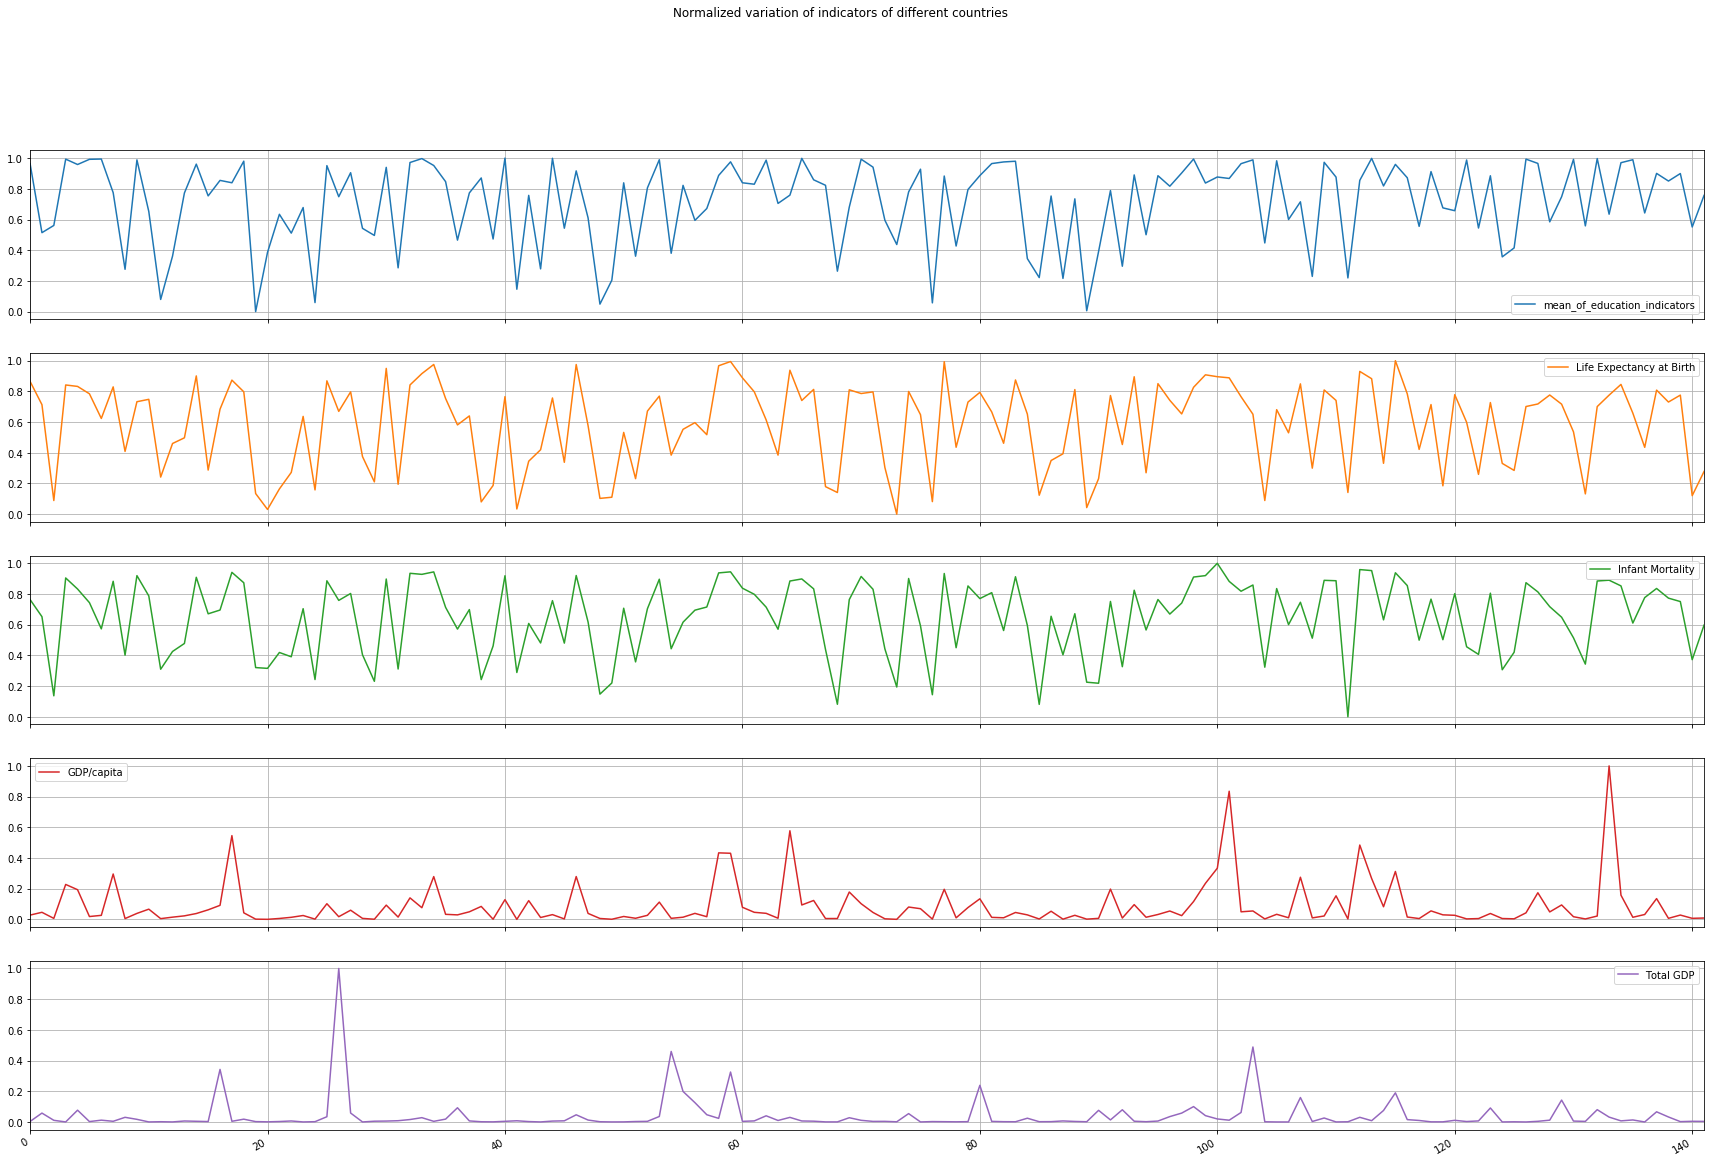

In [41]:
(normalized_indicators).plot(title="Normalized variation of indicators of different countries",kind='line',subplots=True,grid=True,stacked=False,figsize=[30,20])

From the plots above, we can clearly observe the strength of the correlations between the various indicators which we mathematically calculated previously. These plots give further insight into how the previously calculated correlations vary over different countries.

> **What is the correlation between the developement in education and improvement in health and/or economy?**

There is strong correlation between the **Education indicator** and **Life Expectancy at Birth** as well as **Infant Mortality** while also having a small correlation with **GDP/capita**.

___

<a id='exceptionsToTheCorrelations'></a>
### Exceptions to the correlations
<br>
In this section, we are interested in finding any exceptions to the correlations obtained previouly. More clearly, we will try to find countries which show developemnt in the health and economic indicators but not so much in education.

Since, we already have the normalized values of the different indicators in a separate dataFrame we will be using it for the further analysis in this section.

<br>
The correlations between some of the indicators that were not calculated previously are calculated below.

In [42]:
print ("Correlation between Life Expectancy at Birth and GDP/capita :",(pearsonr(normalized_indicators.loc[:,'Life Expectancy at Birth'],normalized_indicators.loc[:,'GDP/capita'])))
print ("Correlation between Infant Mortality and GDP/capita         :",(pearsonr(normalized_indicators.loc[:,'Infant Mortality'],normalized_indicators.loc[:,'GDP/capita'])))
print ("Correlation between Life Expectancy at Birth and Total GDP  :",(pearsonr(normalized_indicators.loc[:,'Life Expectancy at Birth'],normalized_indicators.loc[:,'Total GDP'])))
print ("Correlation between Infant Mortality and GDP/capita         :",(pearsonr(normalized_indicators.loc[:,'Infant Mortality'],normalized_indicators.loc[:,'GDP/capita'])))

Correlation between Life Expectancy at Birth and GDP/capita : (0.4946115767001913, 3.940996682705612e-10)
Correlation between Infant Mortality and GDP/capita         : (0.48868792921062326, 6.824773234405781e-10)
Correlation between Life Expectancy at Birth and Total GDP  : (0.13790530860625763, 0.1017065337114503)
Correlation between Infant Mortality and GDP/capita         : (0.48868792921062326, 6.824773234405781e-10)


For the sake of reference, here are the correlation calculated previously.

In [43]:
print ("Correlation between Education and Life Expectancy at Birth  :",(pearsonr(normalized_indicators.loc[:,'mean_of_education_indicators'],life_expectancy_at_birth_with_averages.loc[:,'avg'])))
print ("Correlation between Education and Infant Mortality          :",(pearsonr(normalized_indicators.loc[:,'mean_of_education_indicators'],infant_mortality_with_averages.loc[:,'avg'])))
print ("Correlation between Education and GDP/capita                :",(pearsonr(normalized_indicators.loc[:,'mean_of_education_indicators'],gdp_per_capita_with_averages.loc[:,'avg'])))
print ("Correlation between Education and Total GDP                 :",(pearsonr(normalized_indicators.loc[:,'mean_of_education_indicators'],total_gdp_with_averages.loc[:,'avg'])))

Correlation between Education and Life Expectancy at Birth  : (0.7562158409471399, 1.4388980057600285e-27)
Correlation between Education and Infant Mortality          : (-0.8138387098813175, 8.131669531150903e-35)
Correlation between Education and GDP/capita                : (0.2855351764054833, 0.0005721871111080819)
Correlation between Education and Total GDP                 : (0.09288267171967814, 0.2715846941738181)


We can visualize the five indicators using a scatter plot to better observe how they vary in relation to each other.

The same is done below.

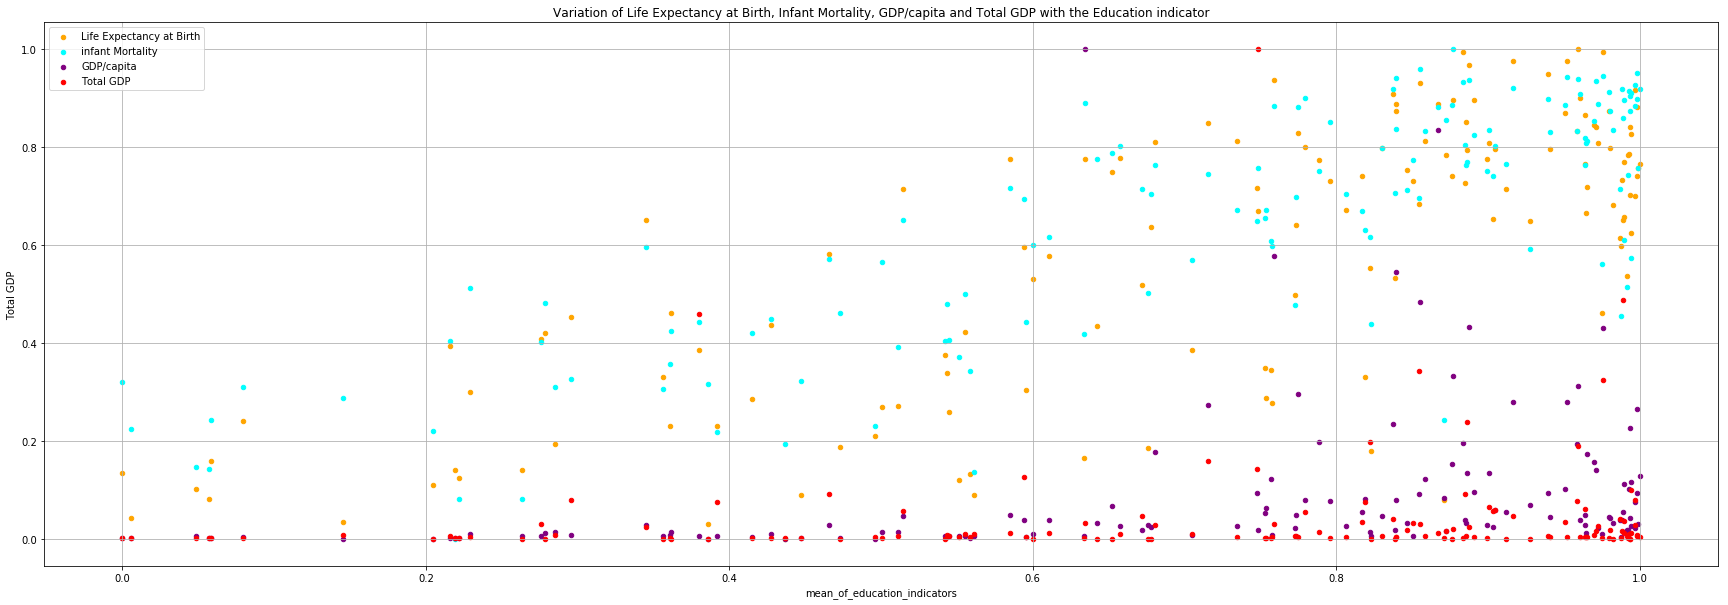

In [44]:
ax1 = normalized_indicators.plot(kind='scatter', x='mean_of_education_indicators', y='Life Expectancy at Birth', color='orange',grid=True,label="Life Expectancy at Birth",title="Variation of Life Expectancy at Birth, Infant Mortality, GDP/capita and Total GDP with the Education indicator")    
ax2 = normalized_indicators.plot(kind='scatter', x='mean_of_education_indicators', y='Infant Mortality', color='cyan',grid=True, ax=ax1,label="infant Mortality")    
ax3 = normalized_indicators.plot(kind='scatter', x='mean_of_education_indicators', y='GDP/capita', color='purple',grid=True, ax=ax1,label="GDP/capita")
ax4 = normalized_indicators.plot(kind='scatter', x='mean_of_education_indicators', y='Total GDP', color='red',grid=True, ax=ax1,label="Total GDP")

The scatter plot above is plotted with **mean_of_education_indicators** on the X-axis and **Life Expectancy at Birth** in **Orange**, **Infant Mortality** in **Cyan**, **GDP/capita** in **Purple** and **Total GDP** in **Red** on the Y-axis.
<br>
<br>
We can observe that, there are no countries with low or even moderate **mean_of_education_indicators** and having high or moderate values for **Life Expectancy at Birth** and/or **Infant Mortality** and/or **GDP/capita** and/or **Total GDP**.

One trend we can notice is that, as the **Education** indicator increases the **Health** indicators increases almost linearly while the **Economic** indicators do not increase as much with it.

Moreover, the data points that seem like exceptions are those towards the top-left, top-right and bottom-right extremities of the plot.
<br>
<br>
We can find some of these countries which are exceptions by looking for countries having high values for the **Health** and **Education** indicators but low values for **Economic** indicators.

In [45]:
check = False
for i in normalized_indicators.index:
    if (normalized_indicators.loc[i,'mean_of_education_indicators']>0.8 and 
        normalized_indicators.loc[i,'Life Expectancy at Birth']>0.8 and 
        normalized_indicators.loc[i,'Infant Mortality']>0.8 and 
        normalized_indicators.loc[i,'GDP/capita']<0.2 and 
        normalized_indicators.loc[i,'Total GDP']<0.2
       ):
        check = True
        print (common_valid_countries[i])
if not check:
    print ("No countries found")

Argentina
Bosnia and Herzegovina
Chile
Costa Rica
Croatia
Cuba
Jamaica
Lebanon
Malta
Montenegro
Panama
Poland
Serbia
Uruguay
Venezuela


These are some of the countries having high values for the **Health** and **Education** indicators but low values for **Economic** indicators.
<br>
<br>
But, as we can see from the scatter plot above, there are not any countries having high values for the **Economic** indicators and low values for the **Health** and **Education** variables.

We can verify this programatically using code similiar to the one above.

In [46]:
check = False #Flag to see if at least a single country satisfying the counditions is found
for i in normalized_indicators.index:
    if (normalized_indicators.loc[i,'mean_of_education_indicators']<0.2 and 
        normalized_indicators.loc[i,'Life Expectancy at Birth']<0.2 and 
        normalized_indicators.loc[i,'Infant Mortality']<0.2 and 
        normalized_indicators.loc[i,'GDP/capita']>0.8 and 
        normalized_indicators.loc[i,'Total GDP']>0.8
       ):
        check = True
        print (common_valid_countries[i])
if not check:
    print ("No countries found")
        
check = False #Flag to see if at least a single country satisfying the counditions is found
for i in normalized_indicators.index:
    if (normalized_indicators.loc[i,'mean_of_education_indicators']<0.4 and 
        normalized_indicators.loc[i,'Life Expectancy at Birth']<0.4 and 
        normalized_indicators.loc[i,'Infant Mortality']<0.4 and 
        normalized_indicators.loc[i,'GDP/capita']>0.6 and 
        normalized_indicators.loc[i,'Total GDP']>0.6
       ):
        check = True
        print (common_valid_countries[i])
if not check:
    print ("No countries found")

No countries found
No countries found


As we can see from the above code output, our claim that- "there are not any countries having high values for the **Economic** indicators and low values for the **Health** and **Education** indicators" is true. In the second loop in the code above, we can see that even after increasing the scope of the indicators a lot there are still no countries that satisfy the conditions.

<br>
These example provide ample evidence to answer our third question which is-

> **Are there any exceptions to the correlations analysed above i.e countries improving in health and economy without much developement in education or vice-versa?**

>#### **This marks the end of the Exploratory Data Analysis phase. The next section would comprise of concluding the findings and insights from this analysis.**

___
___

<a id='conclusions'></a>
## **Conclusions**
<br>
* Regarding the general trend of the indicators over the year range for the different countries, we can conclude from the line charts that, there is not much data available for the education indicators (**Adult literacy rate** and **Female literacy rate**) and hence analysis of any trend(s) related to them over the years range may be misleading or at worst incorrect. Hence, we use the mean of the average values for each countries of the education indicators.

<br>
* From the line charts of the economic indicators (**GDP/capita** and **Total GDP**) we can observe that they do not show a considerable changes except for some exceptions like **United Arab Emirates** which showed a drastic decrease in **GDP/capita** over the years range and **China** which displayed a considerable growth in **Total GDP** over the years range.

<br>
* As for the correlations between the indicators, we see a strong correlation in between the education indicator (mean of the average values for each of the countries for the two education indicators) and both the health indicators.
    * A correlation of **0.756** between the **education indicator** and **Life Expectancy at Birth**, and
    * A correlation of **0.814** between the **education indicator** and **Infant Mortality**.
    
* The correlation between the education indicator and the economic indicators is not very meaningful. 
    * **0.286** with **GDP/capita**, and
    * **0.093** with **Total GDP**
    
<br>
* Although, we see small correlations between the education and economic indicators, we cannot place much faith into these statistics because as mentioned previously we do not have many data points for the education indicators. This is one of the biggest limitations of this analysis.

<br>
* One another limitation we need to keep in mind while understanding the results of this analysis is that, we did not take into account the populations of the countries (which have changed by a considerable amount in the years range). This is a factor that affects the values of the indicators such as **Infant Mortality** which is calculated per 1000 births and also **GDP/capita** directly.

<br>
* One thing that we need to keep in mind is that although we see strong correlations, we cannot make any inferences about the causality of these correlations since we are using only descriptive statistics in this analysis.

<br>
* The search for any exceptions for the trends and correlations observed above leads to a dead end as, there are no countries which have high values for the economic indicators and low values for the health and education indicators (even after significantly expanding the scope of the indicators). Hence, concurring with the strong correlations found previously.

___
___

<a id='bibliography'></a>
## **Bibliography**
<br>
### Data set and sources
<br>
All data sets used in this project were accessed from [Gapminder](https://www.gapminder.org/data/). Further  details about the data sets are given in the table below.

 **Indicator name**       | **Name in Gapminder's list**            | **File name**  
 ------------- |-------------|------------|
 Adult literacy rate| Literacy rate, adult total (% of people ages 15 and above) | indicator SE_ADT_LITR_ZS.xls.xlsx 
 Female literacy rate | Literacy rate, youth female (% of females ages 15-24) | indicator SE_ADT_LITR_FE_ZS.xls.xlsx 
 Life expectancy at birth| Life expectancy (years) | indicator life_expectancy_at_birth.xlsx 
 Infant mortality (rate per 1000 births) | Infant mortality (rate per 1,000 births) | indicator gapminder infant_mortality.xlsx 
 GDP/capita (in USD, inflation-adjusted)| GDP/capita (US$, inflation-adjusted) | GDPpercapitaconstant2000US.xlsx 
 Total GDP (in USD, inflation-adjusted)| Total GDP (US$, inflation-adjusted) | indicator gdp_total_ppp.xlsx 

___
___

> ### By: **Anand Karra** submitted as the project for **Data Analysis Process** as part of the **Data Analyst Nanodegree**

___
___